Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

* loaded the dataset for Airlines passengers
* There were 96 observations and 2 features
* The dataset has count of airline passengers for every month from 1995 to 2002
* Created dummy columns for each month
* Calculated the RMSE values for various models & RMSE was lowest for the exponential multiplicative Additive Seasonality
* Then created 'new_data' dataset from the original dataset for testing purpose(for 2002).
* Trained the model on the dataset which had data upto 2001 
* Predicted the passenger count for 12 months(for 2002)using the best model and plotted the graph for the same.

In [31]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
import statsmodels.formula.api as smf

from numpy import log

In [32]:
ds = pd.read_excel('AirlinesData.xlsx')
ds

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [33]:
ds.rename(columns = {"Month": "date"}, inplace = True)

In [34]:
print(ds.shape)
ds.isnull().sum()

(96, 2)


date          0
Passengers    0
dtype: int64

In [35]:
ds.describe(include='all')

,date,Passengers
count,96,96.000000
unique,96,NaN
top,1999-09-01 00:00:00,NaN
freq,1,NaN
first,1995-01-01 00:00:00,NaN
last,2002-12-01 00:00:00,NaN
mean,NaN,213.708333
std,NaN,71.918216
min,NaN,104.000000
25%,NaN,156.000000


In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<AxesSubplot:>

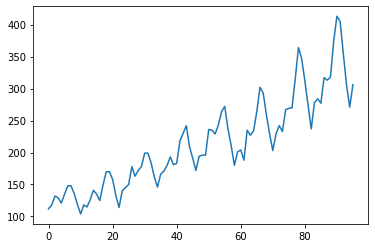

In [37]:
ds.Passengers.plot()
# the data has an exponential curve with multiplicative seasonality

In [38]:
ds_air = ds.copy()
ds_air.head(5)

,date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [39]:
t_list = [x for x in range(1,len(ds)+1)]
ds_air['t'] = t_list

ds_air['t_square'] = ds_air['t']*ds_air['t']

#log transformation
ds_air['log_passengers'] = log(ds.Passengers)
ds_air.head(15)

,date,Passengers,t,t_square,log_passengers
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791
5,1995-06-01,135,6,36,4.905275
6,1995-07-01,148,7,49,4.997212
7,1995-08-01,148,8,64,4.997212
8,1995-09-01,136,9,81,4.912655
9,1995-10-01,119,10,100,4.779123


In [40]:
ds_air['months'] = ds['date'].dt.month_name() # saves months name from date
ds_air['months'] = [x[0:3] for x in ds_air.months] # will take only first 3 chars of months like jan,feb
ds_air['year']   = ds['date'].dt.year
ds_air

,date,Passengers,t,t_square,log_passengers,months,year
0,1995-01-01,112,1,1,4.718499,Jan,1995
1,1995-02-01,118,2,4,4.770685,Feb,1995
2,1995-03-01,132,3,9,4.882802,Mar,1995
3,1995-04-01,129,4,16,4.859812,Apr,1995
4,1995-05-01,121,5,25,4.795791,May,1995
...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,Aug,2002
92,2002-09-01,355,93,8649,5.872118,Sep,2002
93,2002-10-01,306,94,8836,5.723585,Oct,2002
94,2002-11-01,271,95,9025,5.602119,Nov,2002


In [41]:
dummy = pd.DataFrame(pd.get_dummies(ds_air['months']))
dummy.reindex(sorted(dummy.columns), axis=1)
colsequence = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dummy = dummy.reindex(columns=colsequence ) #sorts the column headings

ds_air = pd.concat([ds_air,dummy], axis=1)
ds_air

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,4.718499,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,5.723585,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,5.602119,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


In [42]:
ds_air['months'] = ds['date'].dt.month_name() # saves months name from date
ds_air['months'] = [x[0:3] for x in ds_air.months]
ds_air

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,4.718499,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,5.723585,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,5.602119,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='months', ylabel='year'>

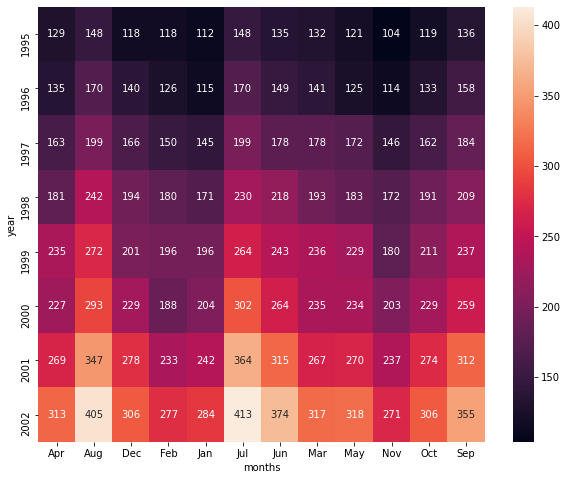

In [43]:
heatmap_passengers = pd.pivot_table(data=ds_air,values='Passengers',index='year',
                                    columns='months',aggfunc='mean',fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(data =heatmap_passengers , annot=True,fmt='g')

<AxesSubplot:xlabel='year', ylabel='Passengers'>

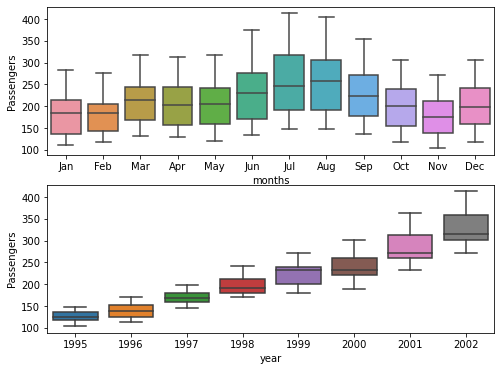

In [44]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='months', y='Passengers', data=ds_air)
plt.subplot(212)
sns.boxplot(x='year', y='Passengers', data=ds_air)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

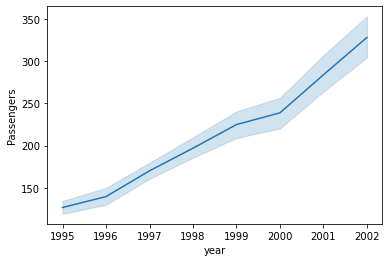

In [45]:
sns.lineplot(x='year',y='Passengers',data=ds_air)

<AxesSubplot:xlabel='months', ylabel='Passengers'>

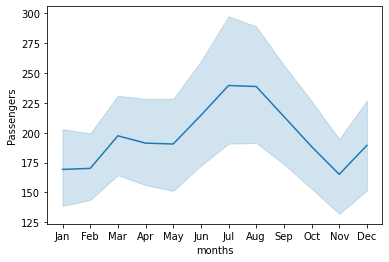

In [79]:
sns.lineplot(x='months',y='Passengers',data=ds_air)

In [46]:
x_train = ds_air.head(76)
x_test  = ds_air.tail(20)
print(x_train.shape)
print(x_test.shape)

(76, 19)
(20, 19)


In [47]:
x_test

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
76,2001-05-01,270,77,5929,5.598422,May,2001,0,0,0,0,1,0,0,0,0,0,0,0
77,2001-06-01,315,78,6084,5.752573,Jun,2001,0,0,0,0,0,1,0,0,0,0,0,0
78,2001-07-01,364,79,6241,5.897154,Jul,2001,0,0,0,0,0,0,1,0,0,0,0,0
79,2001-08-01,347,80,6400,5.849325,Aug,2001,0,0,0,0,0,0,0,1,0,0,0,0
80,2001-09-01,312,81,6561,5.743003,Sep,2001,0,0,0,0,0,0,0,0,1,0,0,0
81,2001-10-01,274,82,6724,5.613128,Oct,2001,0,0,0,0,0,0,0,0,0,1,0,0
82,2001-11-01,237,83,6889,5.468060,Nov,2001,0,0,0,0,0,0,0,0,0,0,1,0
83,2001-12-01,278,84,7056,5.627621,Dec,2001,0,0,0,0,0,0,0,0,0,0,0,1
84,2002-01-01,284,85,7225,5.648974,Jan,2002,1,0,0,0,0,0,0,0,0,0,0,0
85,2002-02-01,277,86,7396,5.624018,Feb,2002,0,1,0,0,0,0,0,0,0,0,0,0


In [48]:
le_model         = smf.ols('Passengers~t',data=x_train).fit()
predicted_linear = pd.Series(le_model.predict(pd.DataFrame(x_test['t'])))
rmse_linear      = np.sqrt(np.mean(np.array(x_test['Passengers'])-np.array(predicted_linear))**2)
rmse_linear      = round(rmse_linear,2)
rmse_linear

36.02

In [49]:
#Exponential

Exp      = smf.ols('log_passengers~t',data=x_train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(x_test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(x_test['log_passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp = round(rmse_Exp,2)
rmse_Exp

298.66

In [50]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=x_train).fit()
pred_Quad = pd.Series(Quad.predict(x_test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad = round(rmse_Quad,2)
rmse_Quad

58.49

In [54]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=x_train).fit()
pred_add_sea = pd.Series(add_sea.predict(x_test[['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                               'Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea = round(rmse_add_sea,2)
rmse_add_sea

132.25

In [56]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                       data=x_train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(x_test[['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                               'Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad = round(rmse_add_sea_quad,2)
rmse_add_sea_quad

39.76

In [57]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                  data = x_train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(x_test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea = round(rmse_Mult_sea,2)
rmse_Mult_sea

137.61

In [58]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                      data = x_train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(x_test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea = round(rmse_Mult_add_sea,2)
rmse_Mult_add_sea

11.78

In [59]:
#comparing the results
model_list                = ["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea",
                                 "rmse_Mult_add_sea"]
rmse_val_list             = [rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,
                                 rmse_Mult_add_sea]

table_rmse                = pd.DataFrame(columns=['Model','RMSE Values'])
table_rmse['Model']       = model_list
table_rmse['RMSE Values'] = rmse_val_list

table_rmse.sort_values(by=['RMSE Values'])

,Model,RMSE Values
6,rmse_Mult_add_sea,11.78
0,rmse_linear,36.02
4,rmse_add_sea_quad,39.76
2,rmse_Quad,58.49
3,rmse_add_sea,132.25
5,rmse_Mult_sea,137.61
1,rmse_Exp,298.66


## Predict for new time period


In [70]:
new_data = ds_air.tail(12)
new_data

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
72,2001-01-01,242,73,5329,5.488938,Jan,2001,1,0,0,0,0,0,0,0,0,0,0,0
73,2001-02-01,233,74,5476,5.451038,Feb,2001,0,1,0,0,0,0,0,0,0,0,0,0
74,2001-03-01,267,75,5625,5.587249,Mar,2001,0,0,1,0,0,0,0,0,0,0,0,0
75,2001-04-01,269,76,5776,5.594711,Apr,2001,0,0,0,1,0,0,0,0,0,0,0,0
76,2001-05-01,270,77,5929,5.598422,May,2001,0,0,0,0,1,0,0,0,0,0,0,0
77,2001-06-01,315,78,6084,5.752573,Jun,2001,0,0,0,0,0,1,0,0,0,0,0,0
78,2001-07-01,364,79,6241,5.897154,Jul,2001,0,0,0,0,0,0,1,0,0,0,0,0
79,2001-08-01,347,80,6400,5.849325,Aug,2001,0,0,0,0,0,0,0,1,0,0,0,0
80,2001-09-01,312,81,6561,5.743003,Sep,2001,0,0,0,0,0,0,0,0,1,0,0,0
81,2001-10-01,274,82,6724,5.613128,Oct,2001,0,0,0,0,0,0,0,0,0,1,0,0


In [71]:
new_data = new_data.drop(columns=['Passengers','log_passengers','year'])

In [72]:
new_data

,date,t,t_square,months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
72,2001-01-01,73,5329,Jan,1,0,0,0,0,0,0,0,0,0,0,0
73,2001-02-01,74,5476,Feb,0,1,0,0,0,0,0,0,0,0,0,0
74,2001-03-01,75,5625,Mar,0,0,1,0,0,0,0,0,0,0,0,0
75,2001-04-01,76,5776,Apr,0,0,0,1,0,0,0,0,0,0,0,0
76,2001-05-01,77,5929,May,0,0,0,0,1,0,0,0,0,0,0,0
77,2001-06-01,78,6084,Jun,0,0,0,0,0,1,0,0,0,0,0,0
78,2001-07-01,79,6241,Jul,0,0,0,0,0,0,1,0,0,0,0,0
79,2001-08-01,80,6400,Aug,0,0,0,0,0,0,0,1,0,0,0,0
80,2001-09-01,81,6561,Sep,0,0,0,0,0,0,0,0,1,0,0,0
81,2001-10-01,82,6724,Oct,0,0,0,0,0,0,0,0,0,1,0,0


In [73]:
ds_air = ds_air.head(84)
print(ds_air.shape)
ds_air.tail()

(84, 19)


,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
79,2001-08-01,347,80,6400,5.849325,Aug,2001,0,0,0,0,0,0,0,1,0,0,0,0
80,2001-09-01,312,81,6561,5.743003,Sep,2001,0,0,0,0,0,0,0,0,1,0,0,0
81,2001-10-01,274,82,6724,5.613128,Oct,2001,0,0,0,0,0,0,0,0,0,1,0,0
82,2001-11-01,237,83,6889,5.468060,Nov,2001,0,0,0,0,0,0,0,0,0,0,1,0
83,2001-12-01,278,84,7056,5.627621,Dec,2001,0,0,0,0,0,0,0,0,0,0,0,1


In [74]:
#picked the model with the lowest RMSE value
#training the model on the entire dataset
model_full = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                      data = ds_air).fit()

In [75]:
predicted_new = model_full.predict(new_data)
predicted_new

72    5.497927
73    5.513520
74    5.657884
75    5.622153
76    5.612434
77    5.730796
78    5.838059
79    5.838434
80    5.731271
81    5.603791
82    5.472057
83    5.610758
dtype: float64

In [76]:
new_data['forecasted_passengers'] = predicted_new
new_data

,date,t,t_square,months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,forecasted_passengers
72,2001-01-01,73,5329,Jan,1,0,0,0,0,0,0,0,0,0,0,0,5.497927
73,2001-02-01,74,5476,Feb,0,1,0,0,0,0,0,0,0,0,0,0,5.513520
74,2001-03-01,75,5625,Mar,0,0,1,0,0,0,0,0,0,0,0,0,5.657884
75,2001-04-01,76,5776,Apr,0,0,0,1,0,0,0,0,0,0,0,0,5.622153
76,2001-05-01,77,5929,May,0,0,0,0,1,0,0,0,0,0,0,0,5.612434
77,2001-06-01,78,6084,Jun,0,0,0,0,0,1,0,0,0,0,0,0,5.730796
78,2001-07-01,79,6241,Jul,0,0,0,0,0,0,1,0,0,0,0,0,5.838059
79,2001-08-01,80,6400,Aug,0,0,0,0,0,0,0,1,0,0,0,0,5.838434
80,2001-09-01,81,6561,Sep,0,0,0,0,0,0,0,0,1,0,0,0,5.731271
81,2001-10-01,82,6724,Oct,0,0,0,0,0,0,0,0,0,1,0,0,5.603791


<AxesSubplot:>

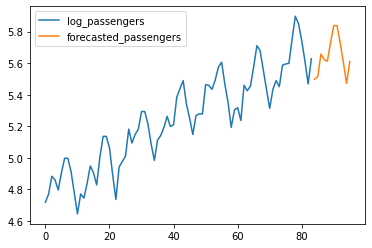

In [77]:
new_var = pd.concat([ds_air,new_data])
new_var[['log_passengers','forecasted_passengers']].reset_index(drop=True).plot()

<AxesSubplot:title={'center':'Passenger count for the year 2002'}, xlabel='months', ylabel='forecasted_passengers'>

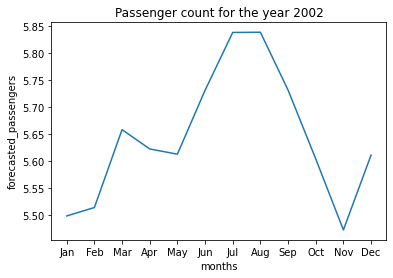

In [78]:
plt.title('Passenger count for the year 2002')
sns.lineplot(x='months',y='forecasted_passengers',data=new_data)